In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
file_path = 'Students_Cleaned_Data.csv'  # Change path if needed
df = pd.read_csv(file_path)

# Convert date columns
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Enrolment_Date'] = pd.to_datetime(df['Enrolment_Date'], dayfirst=True, errors='coerce')

### 1. Bar Chart – Average Time Spent by Course

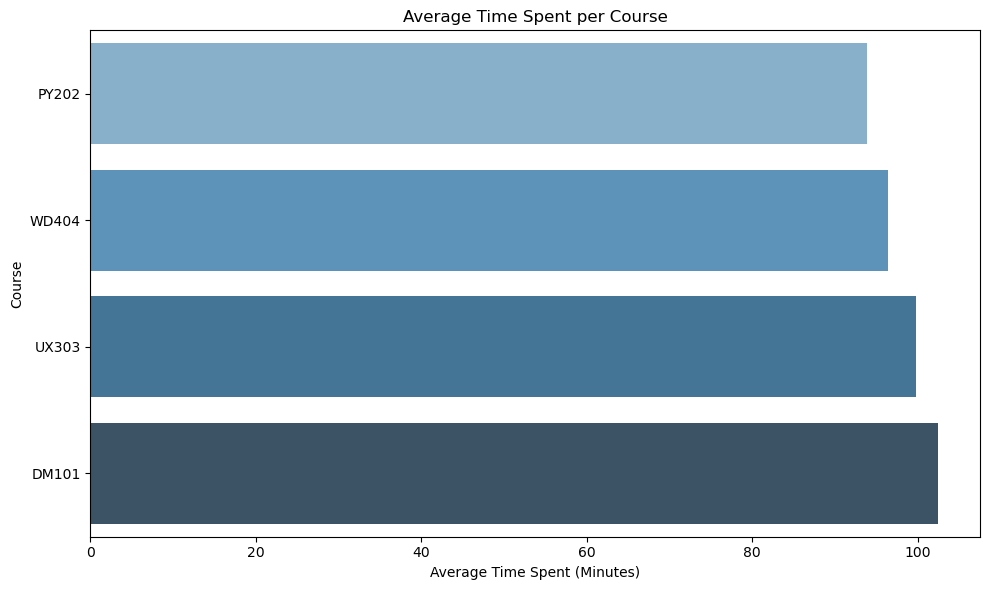

In [34]:
plt.figure(figsize=(10, 6))
course_time = df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()
sns.barplot(x=course_time.values, y=course_time.index,hue=course_time.index, palette='Blues_d')
plt.title('Average Time Spent per Course')
plt.xlabel('Average Time Spent (Minutes)')
plt.ylabel('Course')
plt.tight_layout()
plt.savefig('avg_time_spent_per_course.png')
plt.show()

## 2. Heatmap – Completion % by Gender and Course

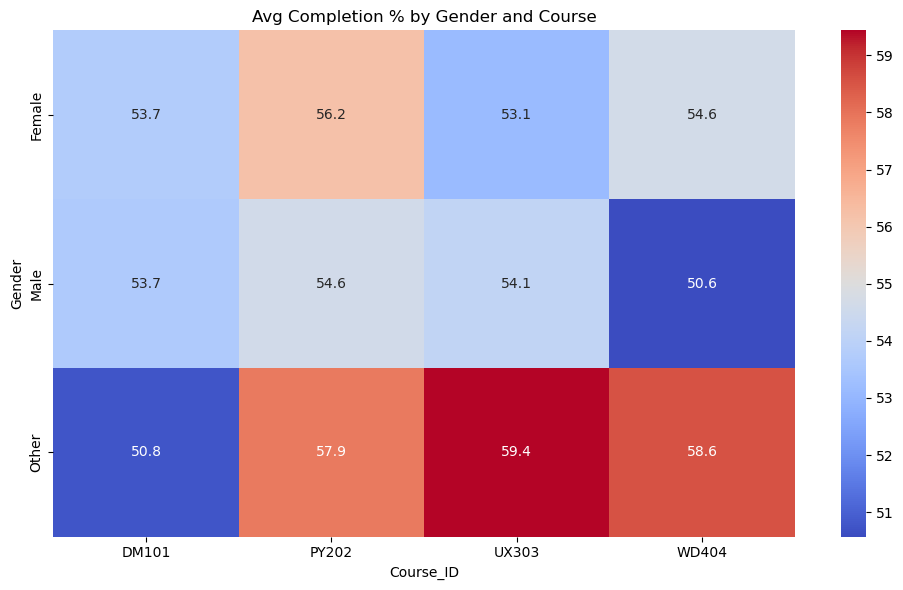

In [36]:
heatmap_data = df.pivot_table(values='Completion_Percentage', index='Gender', columns='Course_ID', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Avg Completion % by Gender and Course')
plt.tight_layout()
plt.savefig('completion_heatmap.png')
plt.show()



## 3. Box Plot – Rating Distribution by Course with Gender Hue, with adjusted legend

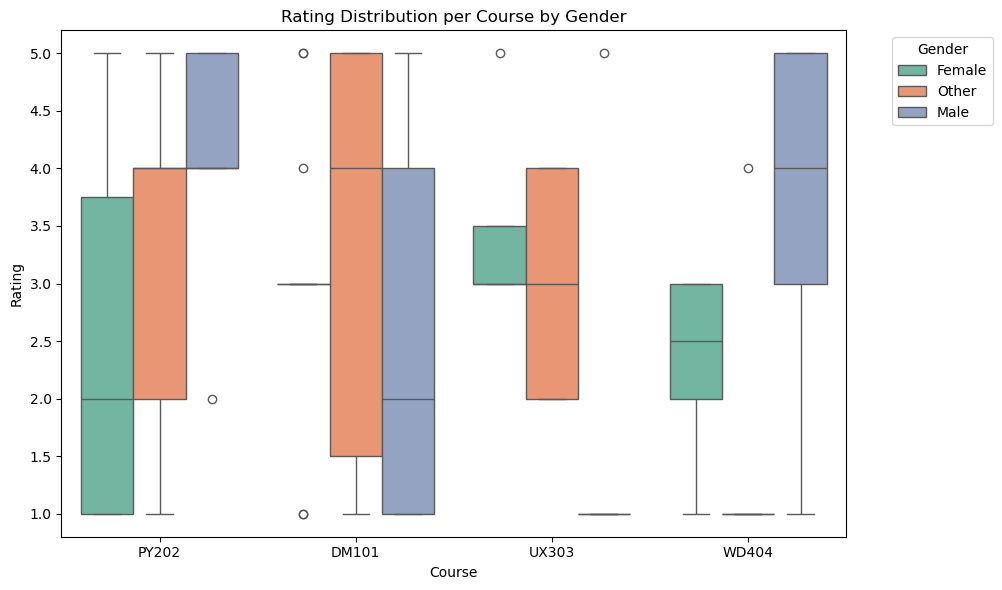

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Course_ID', y='Rating', hue='Gender', palette='Set2')
plt.title('Rating Distribution per Course by Gender')
plt.ylabel('Rating')
plt.xlabel('Course')

# Move the legend outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust plot to make space for legend
plt.savefig('rating_distribution_by_course_gender.png')
plt.show()


## 4. Line Plot – Avg Time Spent Over Time

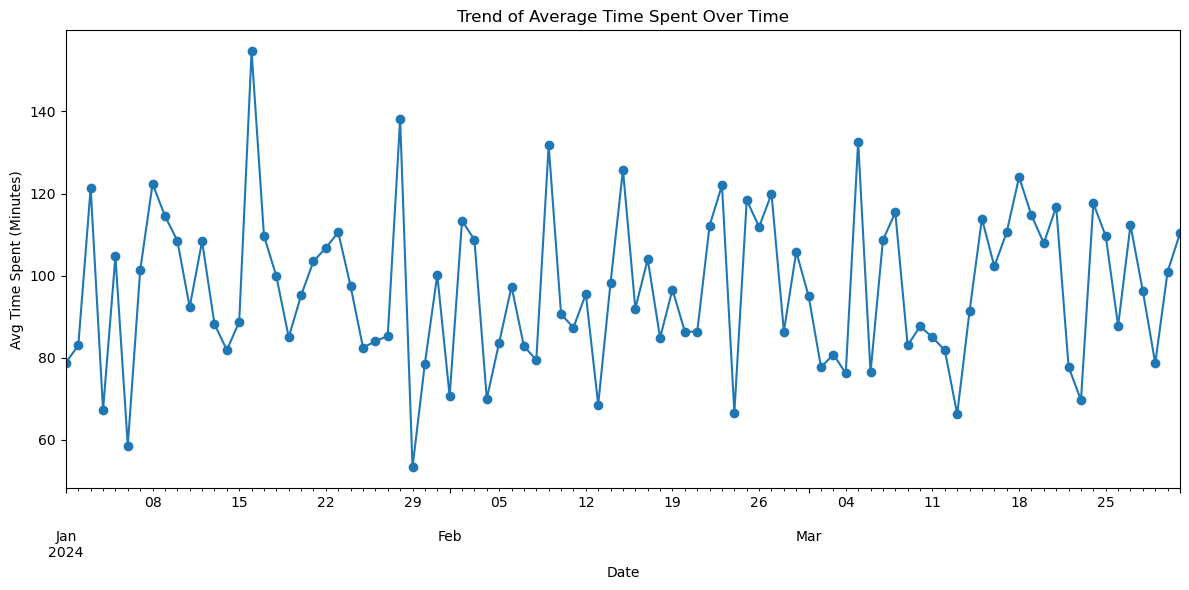

In [50]:
time_trend = df.groupby('Date')['Time_Spent_Minutes'].mean().dropna()
plt.figure(figsize=(12, 6))
time_trend.plot(marker='o')
plt.title('Trend of Average Time Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Time Spent (Minutes)')
plt.tight_layout()
plt.savefig('time_spent_trend.png')
plt.show()



## 5. Scatter Plot – Completion % vs. Rating with external legend

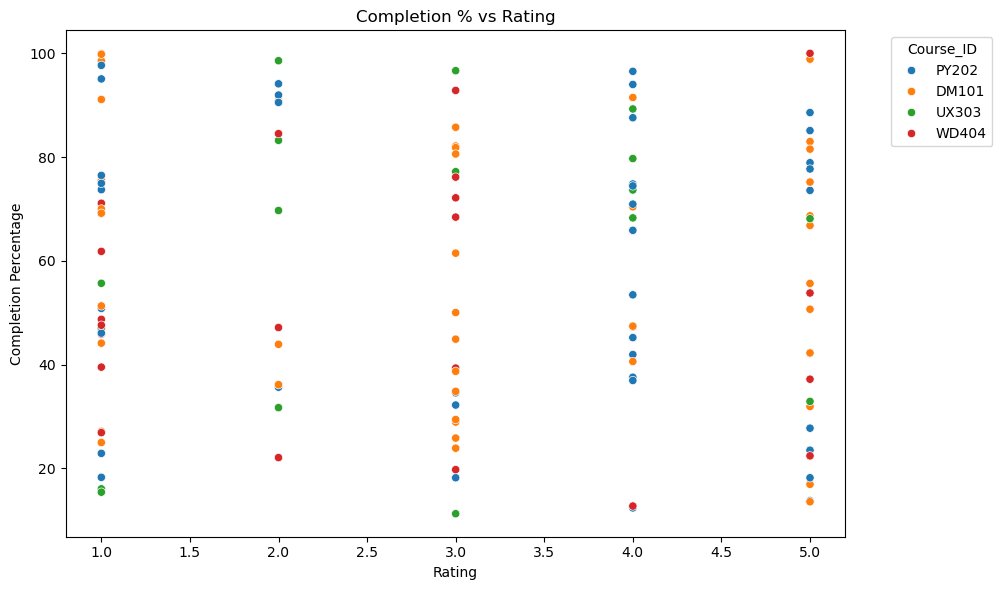

In [54]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rating', y='Completion_Percentage', hue='Course_ID', palette='tab10')
plt.title('Completion % vs Rating')
plt.xlabel('Rating')
plt.ylabel('Completion Percentage')

# Move the legend outside the plot
plt.legend(title='Course_ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust to leave space for the legend
plt.savefig('completion_vs_rating.png')
plt.show()
